# 1 Matrix operations

## 1.1 Create a 4*4 identity matrix

In [33]:
#This project is designed to get familiar with python list and linear algebra
#You cannot use import any library yourself, especially numpy

A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO create a 4*4 identity matrix 
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 get the width and height of a matrix. 

In [34]:
#TODO Get the height and weight of a matrix.
def shape(M):
    return len(M),len(M[0])

In [35]:
# run following code to test your shape function
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


## 1.3 round all elements in M to certain decimal points

In [36]:
# TODO in-place operation, no return value
# TODO round all elements in M to decPts
def matxRound(M, decPts=4):
    row, col = shape(M)
    for i in range(row):
        for j in range(col):
             M[i][j] = round(M[i][j], decPts)

In [37]:
# run following code to test your matxRound function
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.028s

OK


## 1.4 compute transpose of M

In [38]:
#TODO compute transpose of M
def transpose(M):
    return [list(row) for row in zip(*M)]

In [39]:
# run following code to test your transpose function
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.025s

OK


## 1.5 compute AB. return None if the dimensions don't match

In [40]:
#TODO compute matrix multiplication AB, return None if the dimensions don't match
def matxMultiply(A, B):
    out = []
    if len(A[0]) != len(B):
        raise ValueError
         
    BT = transpose(B) 
  
    for ra in range(len(A)):
        row =[]  
        for rbt in range(len(BT)):
            num = 0     
            for c in range(len(BT[0])):
                num +=  A[ra][c] * BT[rbt][c]
            row.append(num)

        out.append(row)  
    
    return out

In [41]:
# run following code to test your matxMultiply function
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.176s

OK


---

# 2 Gaussian Jordan Elimination

## 2.1 Compute augmented Matrix 

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

Return $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [42]:
#TODO construct the augment matrix of matrix A and column vector b, assuming A and b have same number of rows
def augmentMatrix(A, b):
    return [AA + bb for AA, bb in zip(A, b)]

In [43]:
# run following code to test your augmentMatrix function
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## 2.2 Basic row operations
- exchange two rows
- scale a row
- add a scaled row to another

In [44]:
# TODO r1 <---> r2
# TODO in-place operation, no return value
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [45]:
# run following code to test your swapRows function
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


In [46]:
# TODO r1 <--- r1 * scale
# TODO in-place operation, no return value
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
        
    M[r] = [scale*i for i in M[r]]

In [47]:
# run following code to test your scaleRow function
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [48]:
# TODO r1 <--- r1 + r2*scale
# TODO in-place operation, no return value
def addScaledRow(M, r1, r2, scale):
    if scale == 0:
        raise ValueError
    
    tmp = [scale*i for i in M[r2]]
    M[r1] = [M[r1][i] + tmp[i] for i in range(len(tmp))]

In [49]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.3  Gauss-jordan method to solve Ax = b

### Hint：

Step 1: Check if A and b have same number of rows
Step 2: Construct augmented matrix Ab

Step 3: Column by column, transform Ab to reduced row echelon form [wiki link](https://en.wikipedia.org/wiki/Row_echelon_form#Reduced_row_echelon_form)
    
    for every column of Ab (except the last one)
        column c is the current column
        Find in column c, at diagonal and under diagonal (row c ~ N) the maximum absolute value
        If the maximum absolute value is 0
            then A is singular, return None （Prove this proposition in Question 2.4）
        else
            Apply row operation 1, swap the row of maximum with the row of diagonal element (row c)
            Apply row operation 2, scale the diagonal element of column c to 1
            Apply row operation 3 mutiple time, eliminate every other element in column c
            
Step 4: return the last column of Ab

### Remark：
We don't use the standard algorithm first transfering Ab to row echelon form and then to reduced row echelon form.  Instead, we arrives directly at reduced row echelon form. If you are familiar with the stardard way, try prove to yourself that they are equivalent. 

In [50]:
#TODO implement gaussian jordan method to solve Ax = b

""" Gauss-jordan method to solve x such that Ax = b.
        A: square matrix, list of lists
        b: column vector, list of lists
        decPts: degree of rounding, default value 4
        epsilon: threshold for zero, default value 1.0e-16
        
    return x such that Ax = b, list of lists 
    return None if A and b have same height
    return None if A is (almost) singular
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    if len(A) != len(b):
        raise ValueError
    elif len(A) != len(A[0]):
        raise ValueError
    else:
        Ab = augmentMatrix(A, b)
        matxRound(Ab, decPts)
        
        nrow, nclo = shape(Ab)
        for c in range(nclo-1):
            current_max = 0.0
            current_row = c
            for r in range(c, nrow):
                if abs(Ab[r][c]) > current_max:
                    current_max = abs(Ab[r][c])
                    current_row = r
            if abs(current_max) < epsilon:
                return None
            else:
                swapRows(Ab, c, current_row)
                while abs((Ab[c][c]-1.0)) >= epsilon:
                    scaleRow(Ab, c, 1.0 / Ab[c][c])
                for j in range(c):
                    while abs(Ab[j][c]) >= epsilon:
                        addScaledRow(Ab, j, c, -Ab[j][c])
                for j in range(c + 1, nrow):
                    while abs(Ab[j][c]) >= epsilon:
                        addScaledRow(Ab, j, c, -Ab[j][c])
        out = []
        for r in range(nrow):
            out.append([Ab[r][-1]])
        return out

In [51]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 7.067s

OK


## 2.4 Prove the following proposition:

**If square matrix A can be divided into four parts: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} $, where I is the identity matrix, Z is all zero and the first column of Y is all zero, 

**then A is singular.**

Hint: There are mutiple ways to prove this problem.  
- consider the rank of Y and A
- consider the determinate of Y and A 
- consider certain column is the linear combination of other columns

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

---

# 3 Linear Regression: 

## 3.1 Compute the gradient of loss function with respect to parameters 
## (Choose one between two 3.1 questions)

We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$


Proves that 
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

## 3.1 Compute the gradient of loss function with respect to parameters 
## (Choose one between two 3.1 questions)
We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

Proves that 
$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$

$$
\frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

## 3.2  Linear Regression
### Solve equation $X^TXh = X^TY $ to compute the best parameter for linear regression.

In [65]:
#TODO implement linear regression 
'''
points: list of (x,y) tuple
return m and b
'''
def linearRegression(points):
    ListX = list(zip(*points))[0]
    ListY = list(zip(*points))[1]
    X = [[x, 1] for x in ListX]
    Y = [[y] for y in ListY]
    XT = transpose(X)
    A = matxMultiply(XT, X)
    b = matxMultiply(XT, Y)
    ret = gj_Solve(A, b)
    return ret[0][0], ret[1][0]

## 3.3 Test your linear regression implementation

<IPython.core.display.Javascript object>


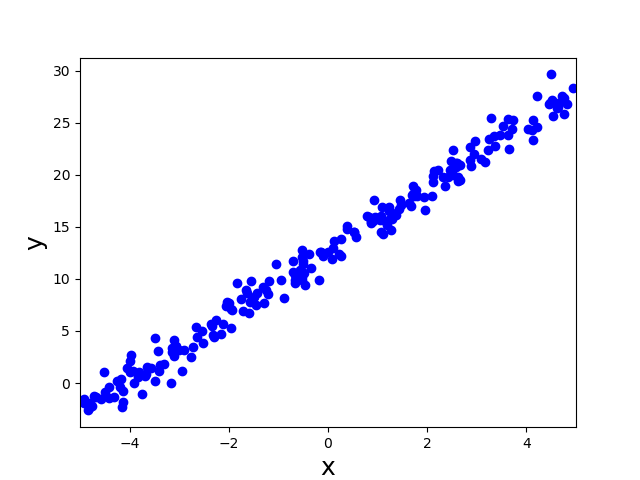

3.083968586355488 12.657802273343902


<IPython.core.display.Javascript object>


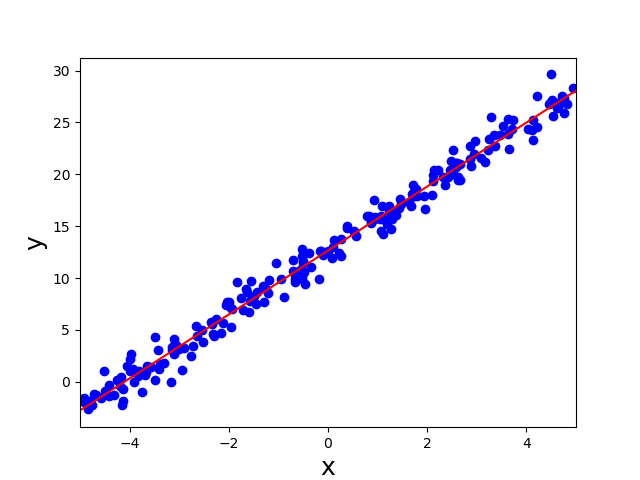

In [64]:
#TODO Construct the linear function
%matplotlib notebook
from helper import *

seed = 9999

X,Y = generatePoints2D(seed)
vs_scatter_2d(X,Y)
points = list(zip(X,Y))

#TODO Construct points with gaussian noise
import random

#TODO Compute m and b and compare with ground truth
m,b = linearRegression(points)
print(m,b)
vs_scatter_2d(X, Y, m, b)